In [2]:
import os, csv
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

In [3]:
logpath = os.path.join('..','..','logfile-plotting')
logname = [c for c in os.listdir(logpath) if '.log' in c and 'dpcr' in c]
names = ['ch1_t', 'ch1_b', 'ch2_t', 'ch2_b', 'ch3_t', 'ch3_b', 'ch4_t', 'ch4_b', \
         'ch5_t', 'ch5_b', 'ch6_t', 'ch6_b', 'ch7_t', 'ch7_b', 'ch8_t', 'ch8_b']
ticks   = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, \
           21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,\
           39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,\
           57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,\
           75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,\
           93, 94, 95, 96, 97, 98, 99, 100]
# foo = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, \
#        1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, \
#        3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, \
#        4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, \
#        5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, \
#        7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, \
#        8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, \
#        10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, \
#        11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, \
#        12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, \
#        13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, \
#        14800, 14900, 15000]
foo = [180, 300, 530, 650, 880, 1000, 1280, 1400, \
            1580, 1700, 1980, 2100, 2330, 2450, 2680, 2800, \
            3080, 3200, 3480, 3600]
def fopen(i): # For when we need to compare with the other log
    ## Sample usage: ch7 = fopen(3)['ch7_b']
    log = open(os.path.join(logpath,logname[i]),"rt")
    print(logname[i])

    final_data = ""
    header = True # Whether we're still in part before the "start" of the run.
    
    with log as log:
        for line in log:
            if "preheating" not in line and header:
                continue
            elif "preheating" in line and header:
                header = False
            elif line[:6]=="Temps:" and line[9] != '0':
                data = line[9:]
                final_data = final_data + data

    k = StringIO(final_data)
    j = csv.reader(k,delimiter=',')
    return pd.read_csv(k,names=names)
def punt(data, name = "DEADBEEF"):
    if name != "DEADBEEF":
        data = data.rename(name)
    data[data < 120][data > 25 ].plot(figsize=(150,40),xlim=(0,25000),ylim=(30,120),legend=True,grid=True,yticks=ticks)
def kick(data, offset = None, name = "DEADBEEF"):
#     global foo
#     if offset != None:
#         bar = np.array(foo) + int(offset)
#     else:
#         bar = np.array(foo)
    if name == "DEADBEEF":
        name = data
    data = pd.read_csv(data)['CHANNEL0'].rename(name)
    data.plot(figsize=(150,40),xlim=(0,25000),ylim=(50,100),legend=True,grid=True,yticks=ticks,xticks=foo)

In [4]:
from datetime import datetime

# brackets = [[180, 300], [530, 650], [880, 1000], [1280, 1400], \
#             [1580, 1700], [1980, 2100], [2330, 2450], [2680, 2800], \
#             [3080, 3200], [3580, 3700]]
brackets = np.array([[180, 300], [530, 650], [880, 1000], [1280, 1400], \
            [1580, 1700], [1980, 2100], [2330, 2450], [2680, 2800], \
            [3080, 3200], [3480, 3600]])
def genCalData(ch, offset = None,outname = None):
    global brackets
    if offset != None:
        brackets = brackets + offset
    today = datetime.now().strftime("%m-%d-%y_%H-%M")
    fname = [c for c in name if ("ch" + str(ch)) in c and "v3." in c][0]
    print(fname)
    slices = []
    data = pd.read_csv(fname)['CHANNEL0']
    
    for bracket in brackets:
        slices.append(list(data.iloc[bracket[0]:bracket[1]]))
    temps = []
    for s in slices:
        temps.append(np.mean(s))
    results = {
        "Target": [55,60,65,70,75,80,85,90,95,100],
        "Actual": temps
    }
    results = pd.DataFrame(results, columns=["Target","Actual"])
    results["Deviation"] = results["Actual"] - results["Target"]
    results.to_csv(today + "-ch" + str(ch) + ".csv")
    return results
# genCalData(6)

In [5]:
name = [c for c in os.listdir() if '.csv' in c and 'lock' not in c]
name.sort()
print(name)
# datafile = name[int(input())]

['07-17-2020 ThermoFisher.csv', 'out.csv', 'v3.1ch2 08-11-2020.csv', 'v3.1ch3 08-11-2020.csv', 'v3.1ch4 08-11-2020.csv', 'v3.1ch5 08-11-2020.csv', 'v3.1ch6 08-11-2020.csv', 'v3.1ch7 08-11-2020.csv']


0    07-17-2020 ThermoFisher.csv
1                        out.csv
2         v3.1ch2 08-11-2020.csv
3         v3.1ch3 08-11-2020.csv
4         v3.1ch4 08-11-2020.csv
5         v3.1ch5 08-11-2020.csv
6         v3.1ch6 08-11-2020.csv
7         v3.1ch7 08-11-2020.csv
dtype: object
3


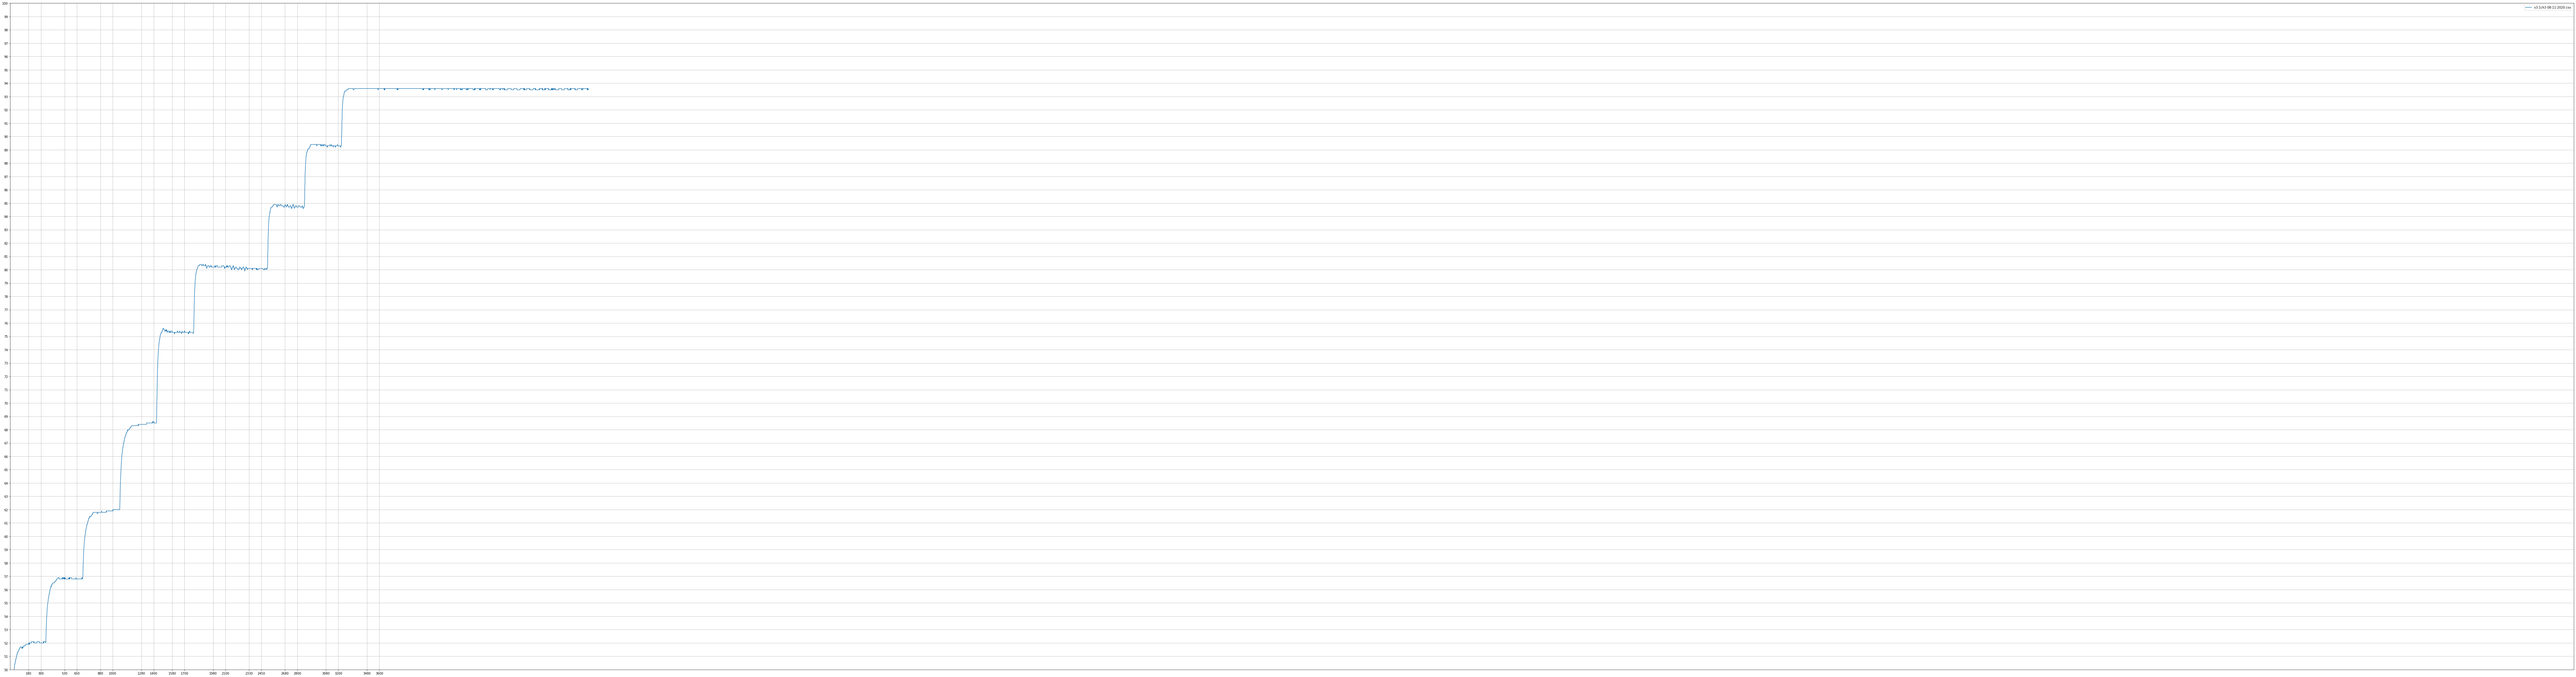

In [8]:
print(pd.Series(name))
i = int(input())
kick(name[i])

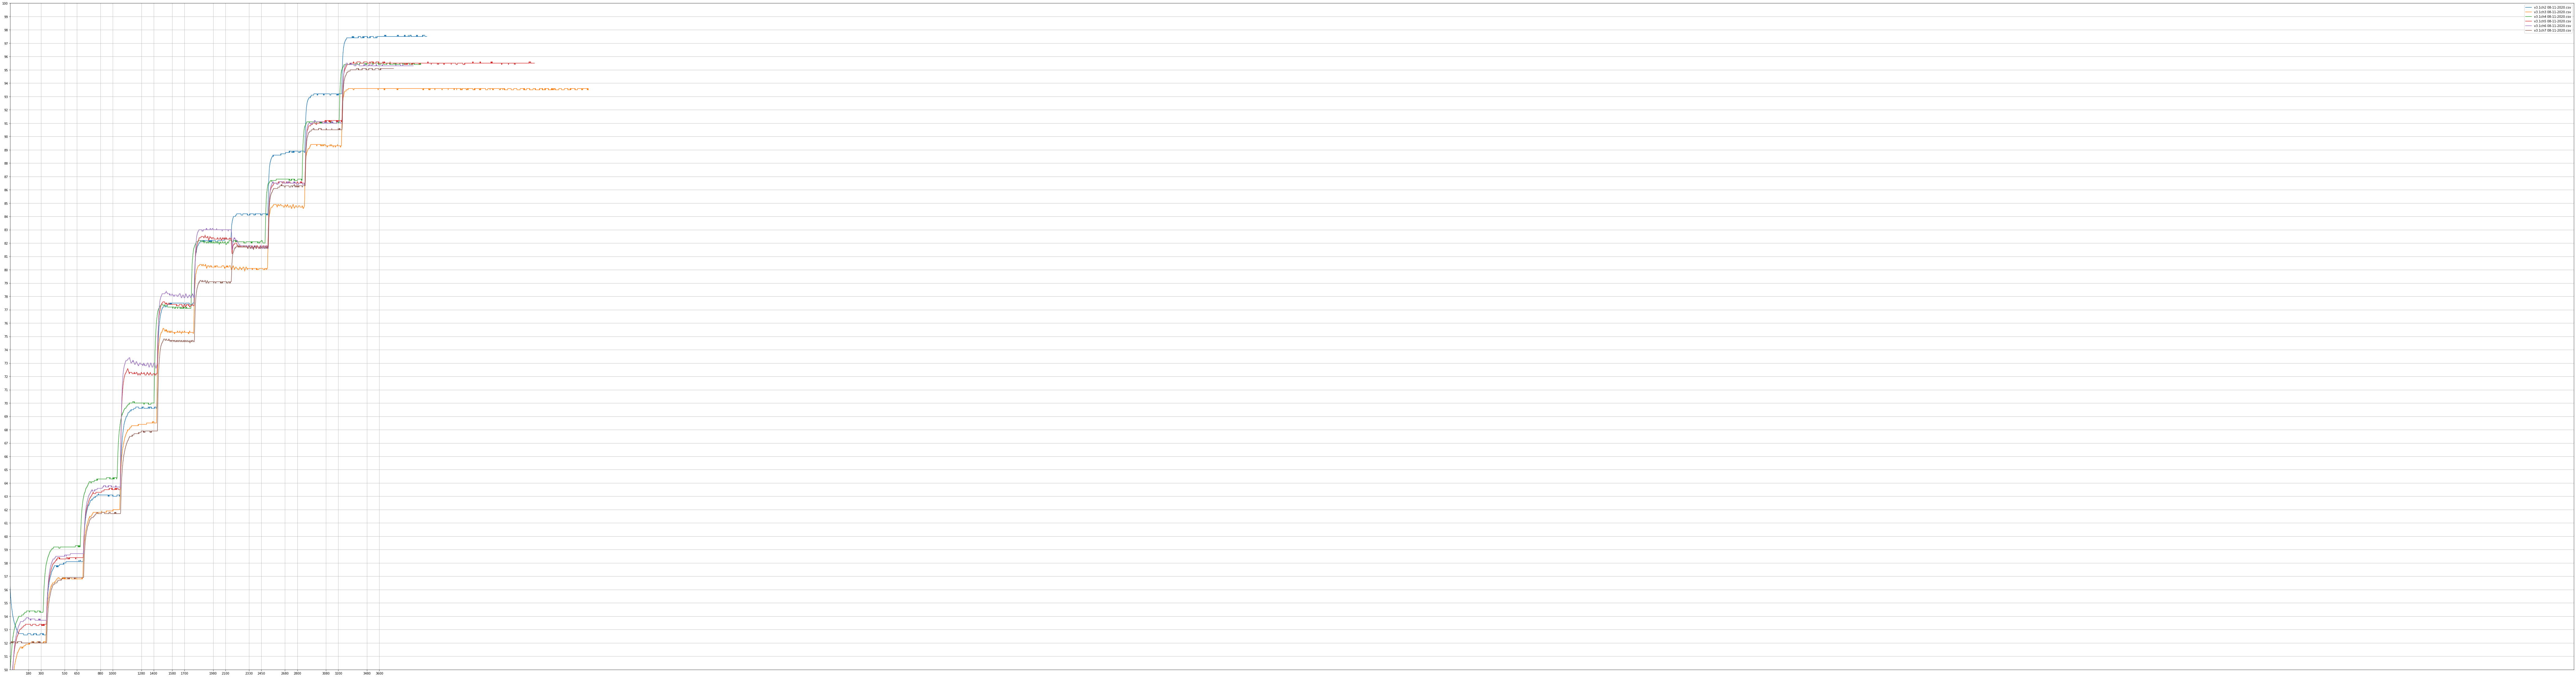

In [9]:
for i in [2,3,4,5,6,7]:
    kick(name[i])

In [14]:
genCalData(7)

v3.1ch7 08-11-2020.csv


,Target,Actual,Deviation
0,55,52.017500,-2.982500
1,60,56.887500,-3.112500
2,65,61.734167,-3.265833
3,70,67.877500,-2.122500
4,75,74.652500,-0.347500
5,80,79.082500,-0.917500
6,85,81.675000,-3.325000
7,90,86.279167,-3.720833
8,95,90.503333,-4.496667
9,100,95.058333,-4.941667


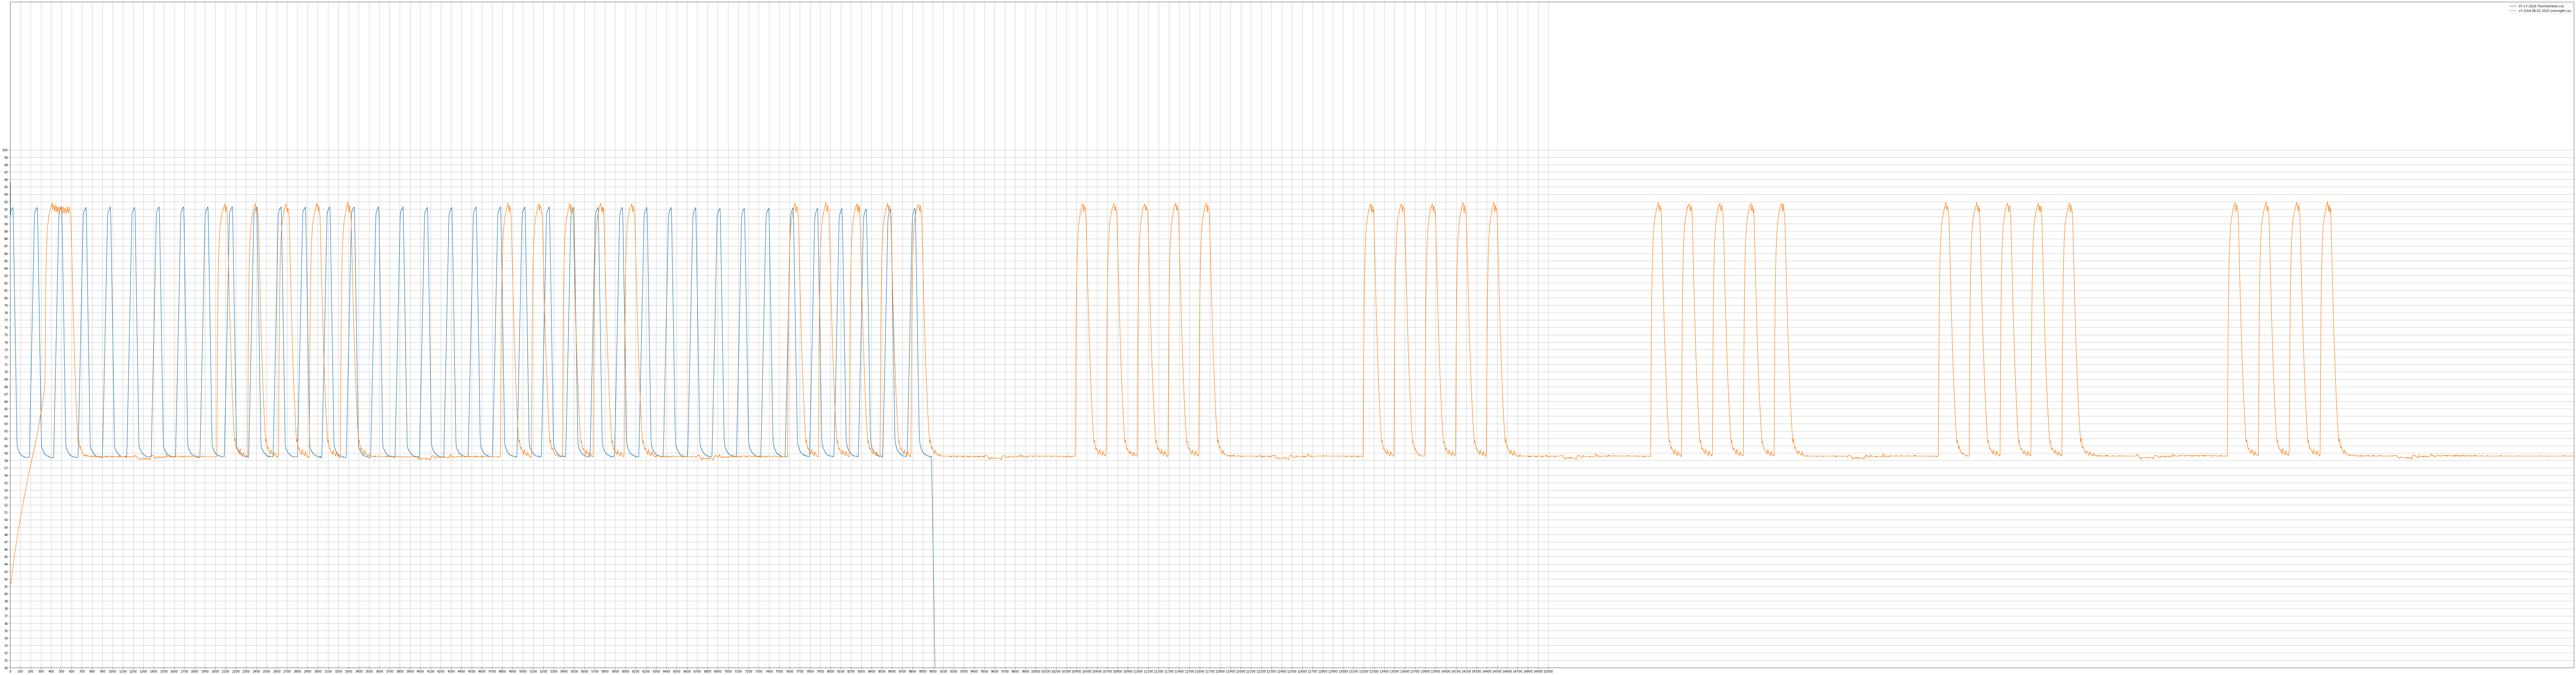

In [13]:
for datafile in name:
    kick(datafile)
plt.savefig('08-01-2020-ch4 Full Run.png')

In [29]:
brackets
b = np.array(brackets)
b[1][1]

650

In [ ]:
kick(name[0])
punt(fopen(0)['ch5_b'], name="temperature log")
plt.savefig('ch5-with-logfile.png')

dpcr-camera2020-07-31_14.34.39.log.bak


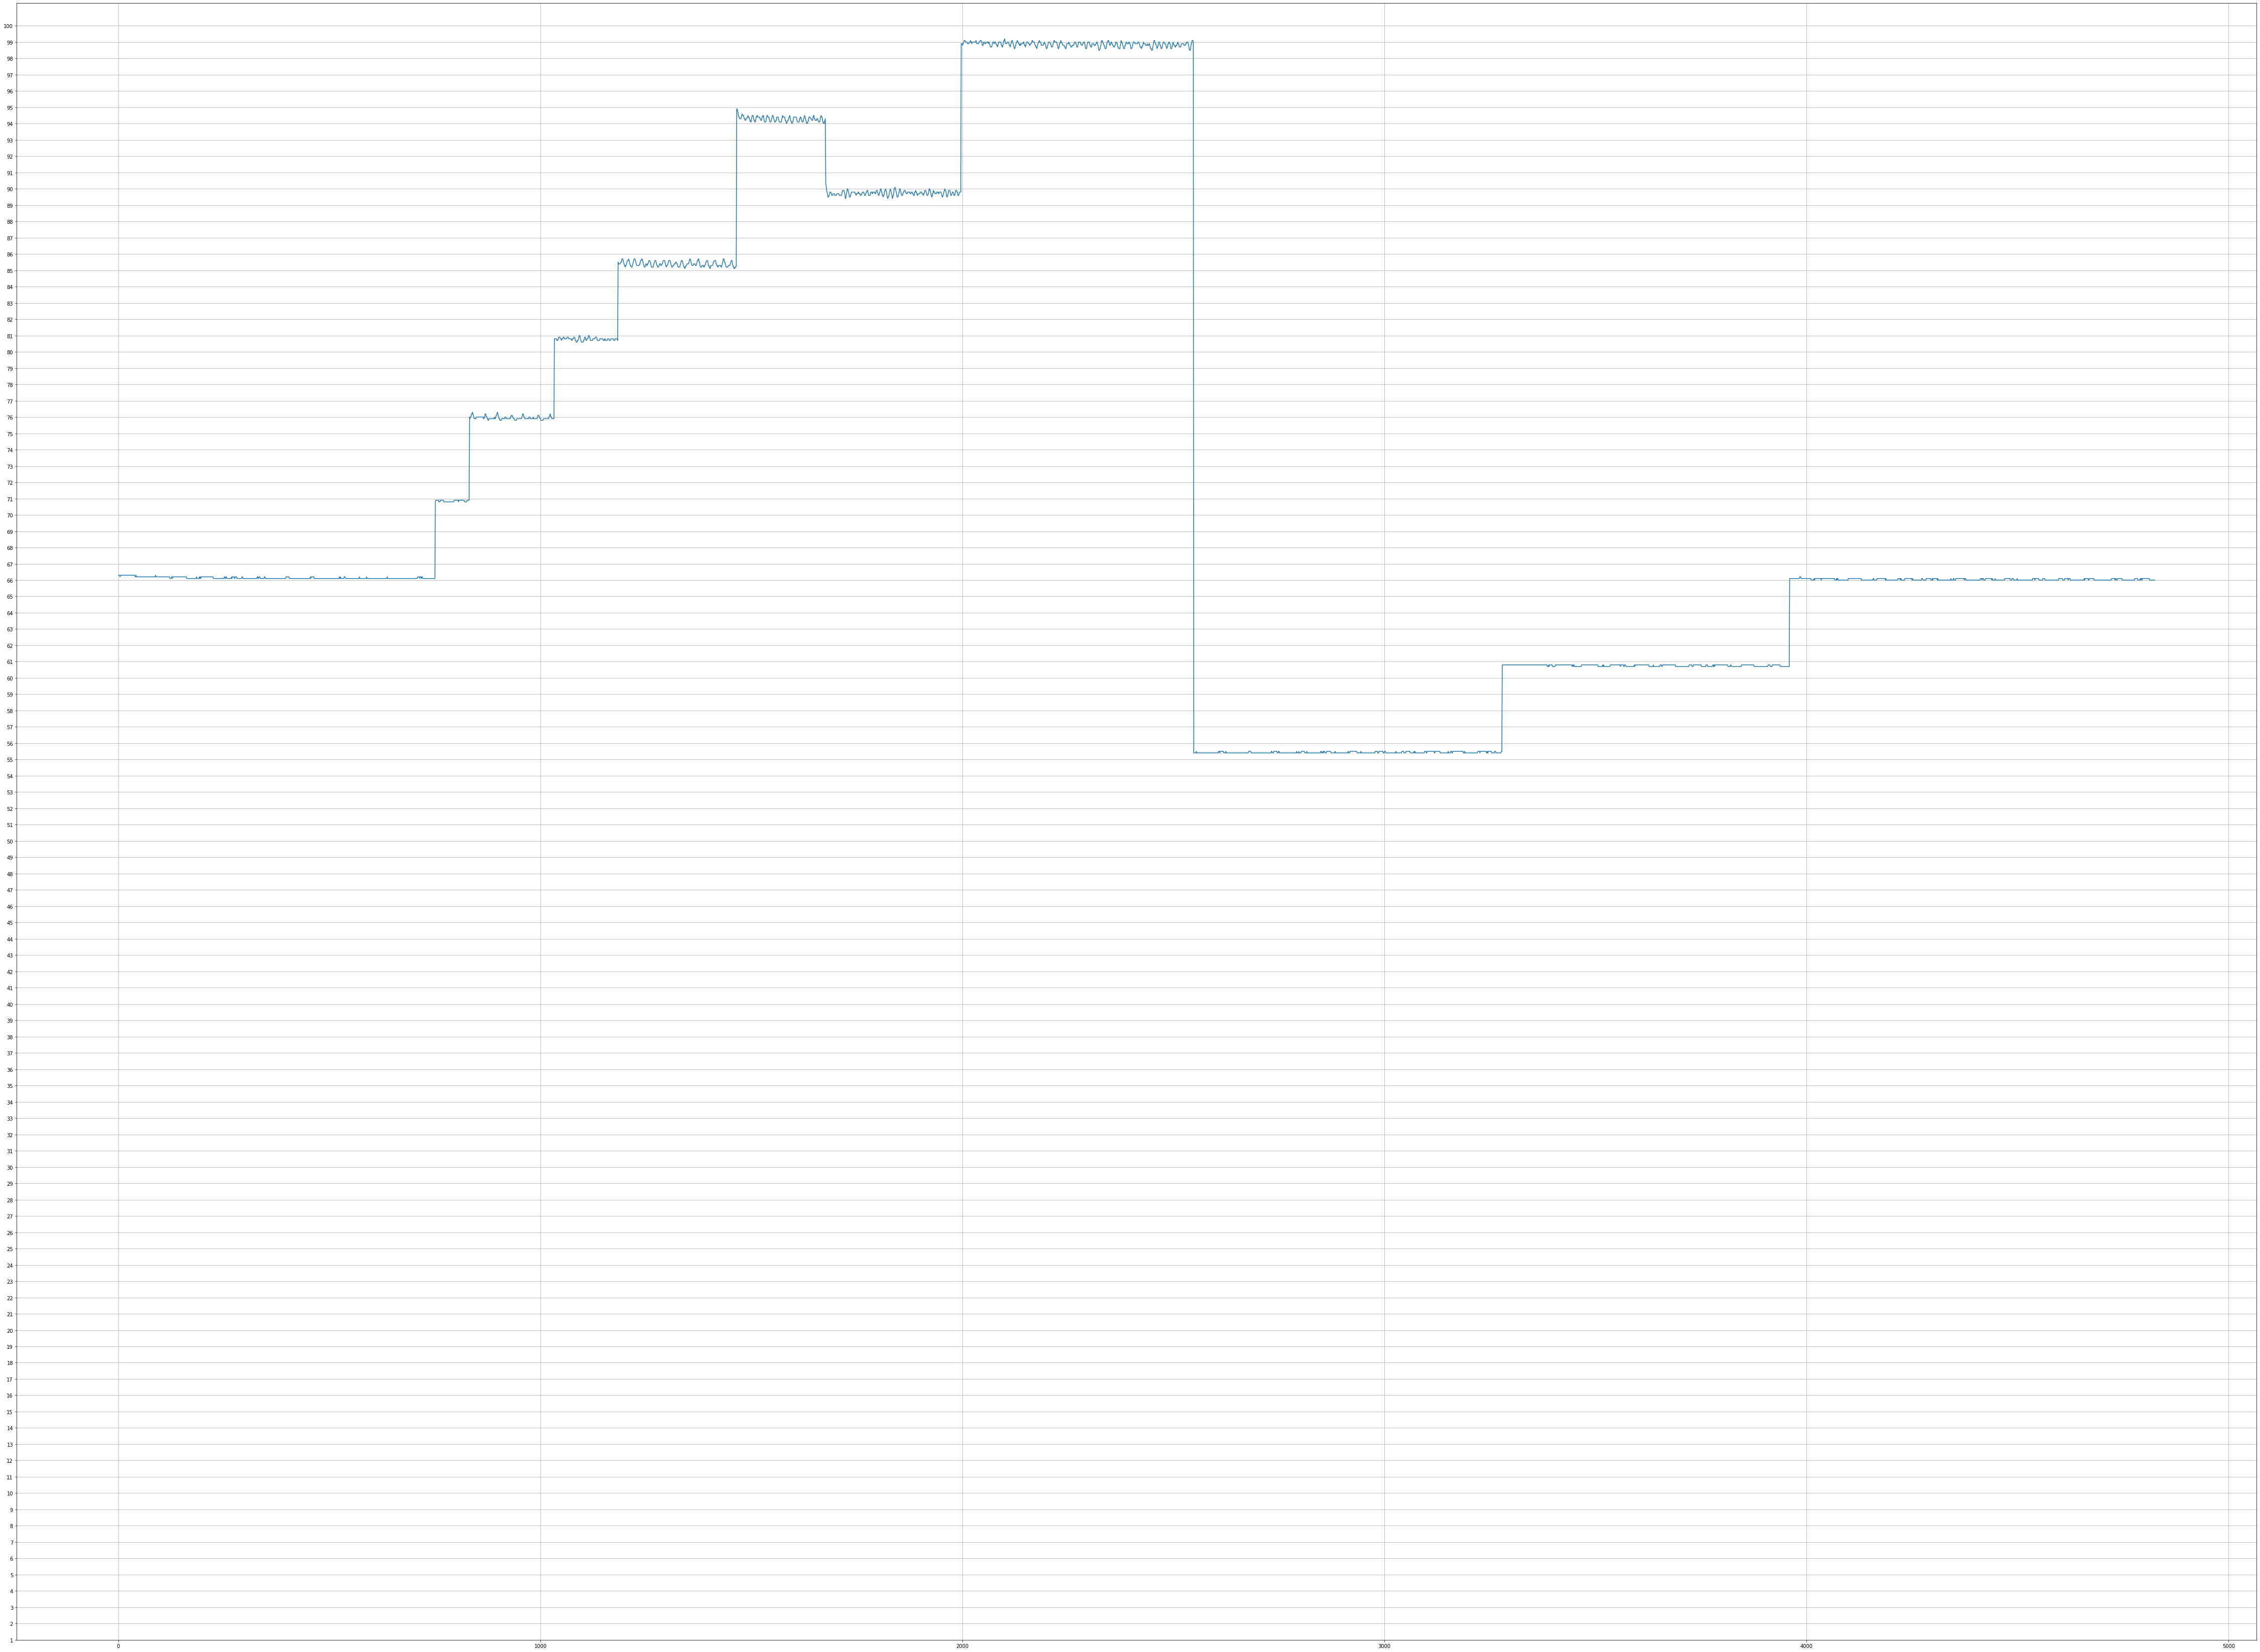

In [113]:
data = pd.read_csv(name[0])['CHANNEL0']
foo = [400,1150,1240,1320,1400,1600,1700,1850,1920,2200,2350,2560,2660,2980,3050,3600,3950,\
       4680,4800,5480,5600]
k = [data.loc[400:1150],  data.loc[1240:1320], data.loc[1400:1600], data.loc[1700:1850], data.loc[1920:2200],\
     data.loc[2350:2560], data.loc[2660:2980], data.loc[3050:3600], data.loc[3950:4680], data.loc[4800:5480],\
     data.loc[5600:]]
l = [len(k) for k in k]
pdata = []
for j in k:
    pdata = pdata + list(j)
pd.Series(pdata).plot(figsize = (80,60),grid=True, yticks=ticks)

In [112]:
import numpy as np
t55 = list(k[-3])
t60 = list(k[-2])
t65 = list(k[0]) + list(k[-1])
t70 = list(k[1])
t75 = list(k[2])
t80 = list(k[3])
t85 = list(k[4])
t90 = list(k[6])
t95 = list(k[5])
t100 = list(k[7])
temps = [\
    [55,t55],\
    [60,t60],\
    [65,t65],\
    [70,t70],\
    [75,t75],\
    [80,t80],\
    [85,t85],\
    [90,t90],\
    [95,t95],\
    [100,t100]]
for i in temps:
    print(str(i[0]) + " // " + str(float(np.mean(i[1]))) + " // " + str(float(np.mean(i[1])) - i[0]))

55 // 55.429001367989045 // 0.429001367989045
60 // 60.76211453744494 // 0.762114537444937
65 // 66.08800247371677 // 1.0880024737167702
70 // 70.85555555555554 // 0.8555555555555401
75 // 75.95074626865672 // 0.9507462686567152
80 // 80.78278145695364 // 0.7827814569536429
85 // 85.39252669039146 // 0.39252669039146326
90 // 89.73520249221184 // -0.2647975077881597
95 // 94.29099526066351 // -0.7090047393364927
100 // 98.86787658802177 // -1.1321234119782275


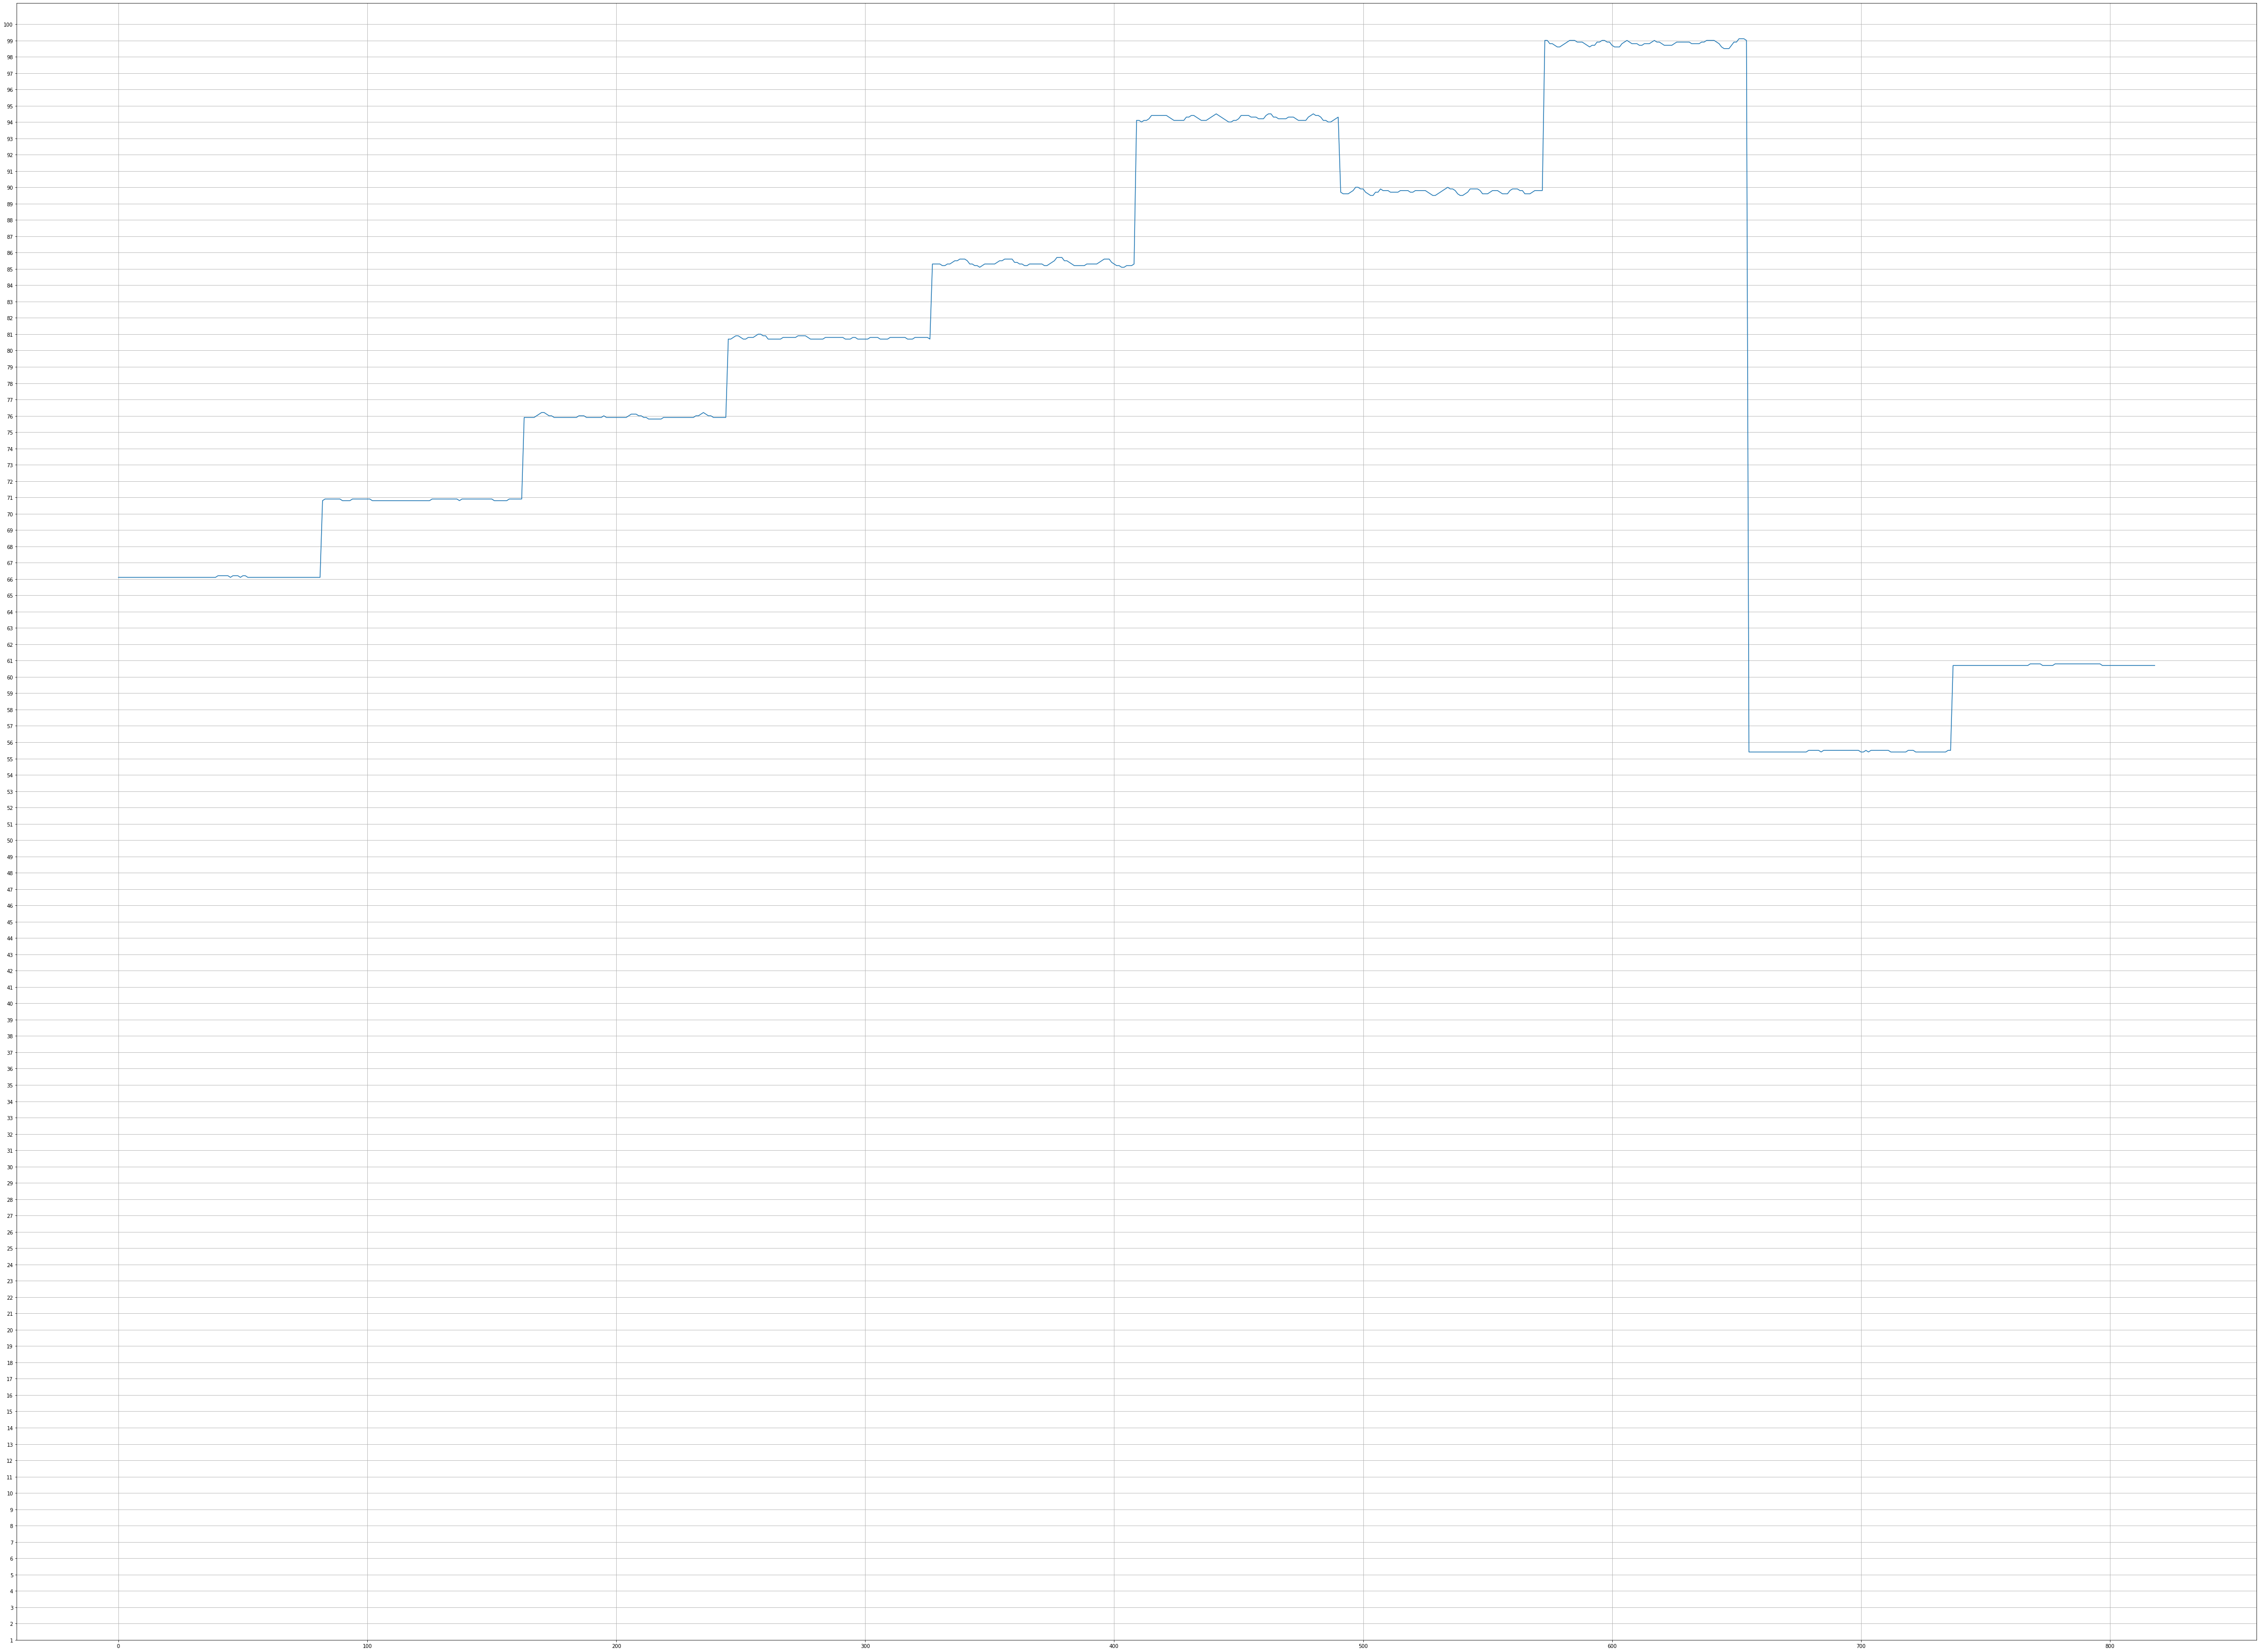

In [124]:
even_data = [data.loc[1069:1150],  data.loc[1240:1320], data.loc[1519:1600], data.loc[1769:1850], data.loc[2119:2200],\
     data.loc[2479:2560], data.loc[2899:2980], data.loc[3519:3600], data.loc[4599:4680], data.loc[5399:5480],\
     data.loc[-81:-1]]
edp = []
for j in even_data:
    edp = edp + list(j)
pd.Series(edp).plot(figsize = (80,60),grid=True, yticks=ticks)

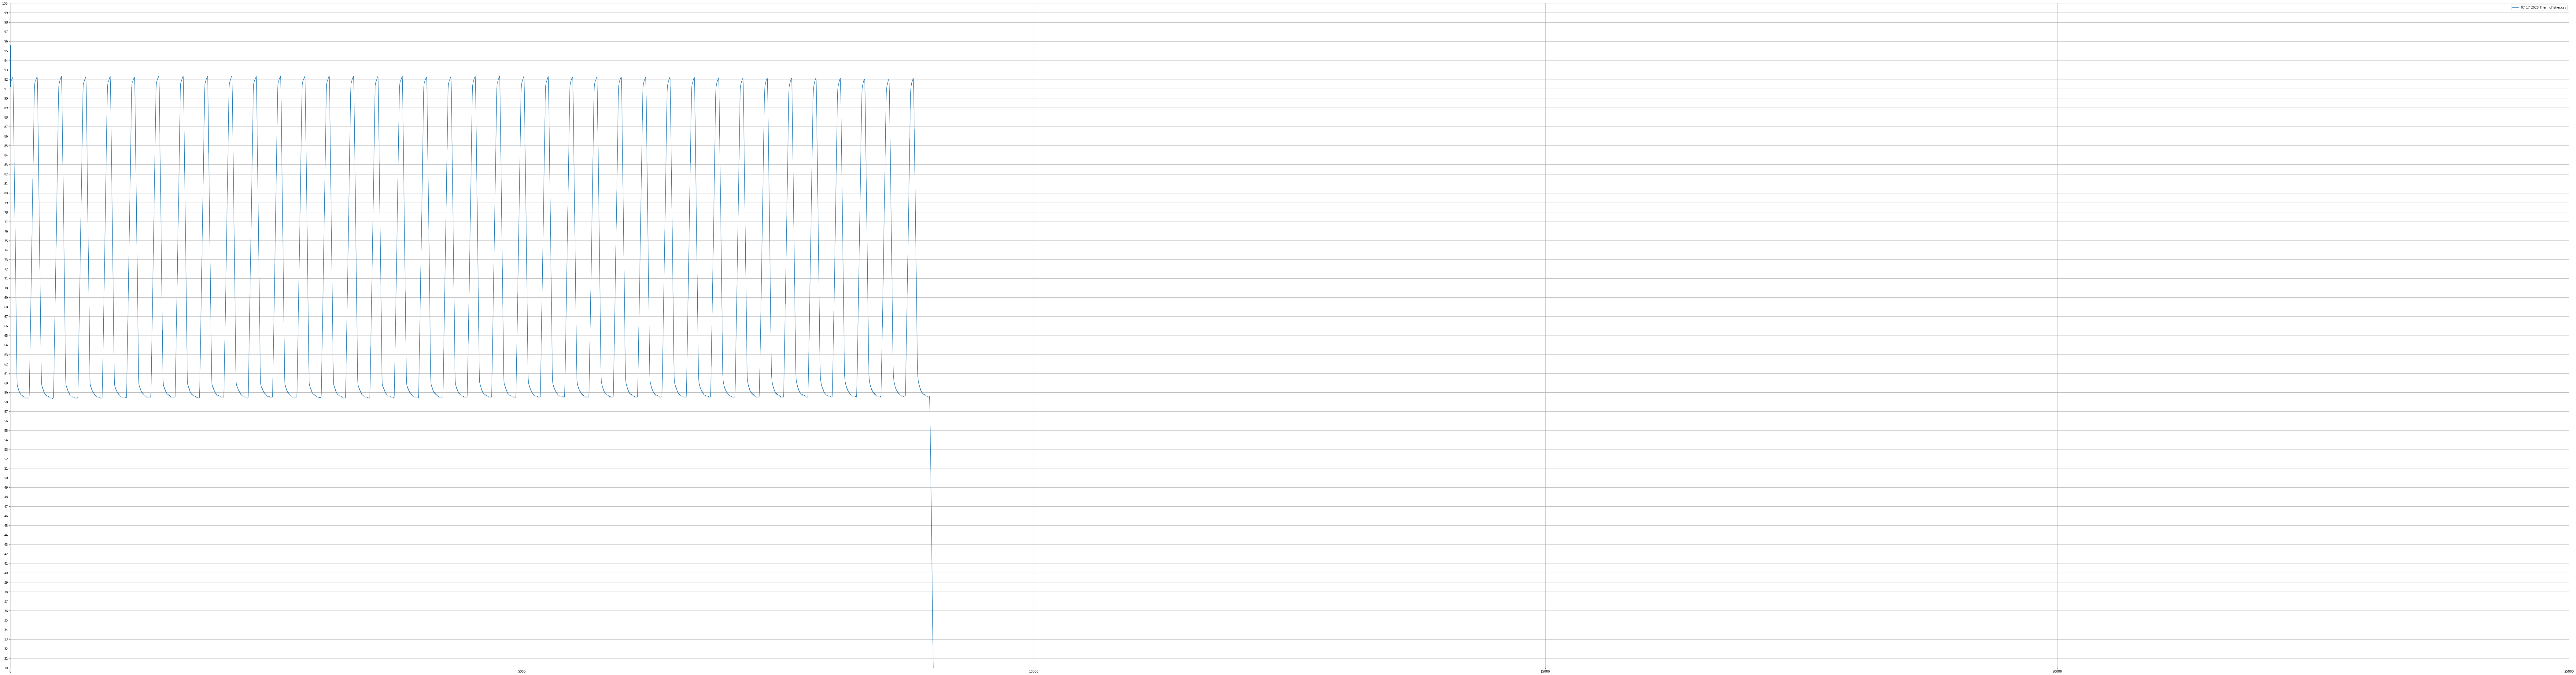

In [132]:
kick(name[0])